# 🌸 Floranet

---
- 902011, Moleri Andrea, a.moleri@campus.unimib.it
- 865939, Armani Filippo, f.armani1@campus.unimib.it
---

## 🎯 Domain and Objectives

The notebook you are about to read contains a project called Floranet, which aims to classify, through the use of machine learning and deep learning techniques, a dataset containing 102 classes of different flowers. In particular, the dataset used is known as the [Oxford Flower Dataset](https://www.robots.ox.ac.uk/~vgg/data/flowers/102/index.html), compiled by Maria-Elena Nilsback and Andrew Zisserman. Each of the 102 classes consists of a variable number ranging from 40 to 258 images per class. The images have large scale, pose and light variations. In addition, there are categories that have large variations within the category and several very similar categories. The dataset is visualized using isomap with shape and colour features. Our aim is therefore to investigate the possibilities of building models in order to solve the classification task. In other words, given an image of a flower, we want to be able to correctly identify and recognize the flower in question, minimizing the margin of error as much as possible.

In [20]:
import os
import pathlib
import tarfile
import requests
import shutil

def decompress(url, out_dir, old_name, new_name):
  file_name = url.split('/')[-1]
  file_path = os.path.join(out_dir, file_name)

  print(f"Extracting {file_name}...", end=" ")

  with tarfile.open(file_path, "r:gz") as tar:
    tar.extractall(path=out_dir)

  shutil.move(old_name, new_name)

  print(f"Completed!")

url = ["https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102flowers.tgz",
       "https://www.robots.ox.ac.uk/~vgg/data/flowers/102/102segmentations.tgz",
       "https://www.robots.ox.ac.uk/~vgg/data/flowers/102/imagelabels.mat"]

out_dir = os.path.join(pathlib.Path('./').parent.absolute(), "Data")
os.makedirs(out_dir, exist_ok=True)

for u in url:
    file_name = u.split('/')[-1]
    file_path = os.path.join(out_dir, file_name)

    if not os.path.exists(file_path):
        print(f"Downloading {file_name}...", end=" ")
        response = requests.get(u)
        with open(file_path, 'wb') as f:
            f.write(response.content)
        print(f"Completed!")
    else:
        print(f"The file {file_name} already exists.")

# Paths
images_dir = os.path.join(out_dir, "images")
segmented_dir = os.path.join(out_dir, "segmented_images")
labels_path = os.path.join(out_dir, 'imagelabels.mat')

if not os.path.exists(images_dir):
    decompress(url[0], out_dir, os.path.join(out_dir, "jpg"), images_dir)

if not os.path.exists(segmented_dir):
    decompress(url[1], out_dir, os.path.join(out_dir, "segmim"), segmented_dir)

The file 102flowers.tgz already exists.
The file 102segmentations.tgz already exists.
The file imagelabels.mat already exists.


In [21]:
import os
from scipy.io import loadmat
import pandas as pd

# Load labels
labels_data = loadmat(labels_path)
labels = labels_data['labels'][0]  # Original numeric labels

# Flower names mapping from the professor's code
NAMES = [
    "Pink Primrose", "Hard-Leaved Pocket Orchid", "Canterbury Bells",
    "Sweet Pea", "English Marigold", "Tiger Lily", "Moon Orchid",
    "Bird Of Paradise", "Monkshood", "Globe Thistle", "Snapdragon",
    "Colt's Foot", "King Protea", "Spear Thistle", "Yellow Iris",
    "Globe-Flower", "Purple Coneflower", "Peruvian Lily", "Balloon Flower",
    "Giant White Arum Lily", "Fire Lily", "Pincushion Flower", "Fritillary",
    "Red Ginger", "Grape Hyacinth", "Corn Poppy", "Prince Of Wales Feathers",
    "Stemless Gentian", "Artichoke", "Sweet William", "Carnation",
    "Garden Phlox", "Love In The Mist", "Mexican Aster", "Alpine Sea Holly",
    "Ruby-Lipped Cattleya", "Cape Flower", "Great Masterwort", "Siam Tulip",
    "Lenten Rose", "Barbeton Daisy", "Daffodil", "Sword Lily", "Poinsettia",
    "Bolero Deep Blue", "Wallflower", "Marigold", "Buttercup", "Oxeye Daisy",
    "Common Dandelion", "Petunia", "Wild Pansy", "Primula", "Sunflower",
    "Pelargonium", "Bishop Of Llandaff", "Gaura", "Geranium", "Orange Dahlia",
    "Pink-Yellow Dahlia?", "Cautleya Spicata", "Japanese Anemone",
    "Black-Eyed Susan", "Silverbush", "Californian Poppy", "Osteospermum",
    "Spring Crocus", "Bearded Iris", "Windflower", "Tree Poppy", "Gazania",
    "Azalea", "Water Lily", "Rose", "Thorn Apple", "Morning Glory",
    "Passion Flower", "Lotus", "Toad Lily", "Anthurium", "Frangipani",
    "Clematis", "Hibiscus", "Columbine", "Desert-Rose", "Tree Mallow",
    "Magnolia", "Cyclamen", "Watercress", "Canna Lily", "Hippeastrum",
    "Bee Balm", "Ball Moss", "Foxglove", "Bougainvillea", "Camellia", "Mallow",
    "Mexican Petunia", "Bromelia", "Blanket Flower", "Trumpet Creeper",
    "Blackberry Lily"
]

# Create a mapping from label index to flower name
ID_NAMES = dict(zip([x for x in range(len(NAMES))], NAMES))

# Get images and pair with labels (convert numeric labels to flower names)
image_files = sorted([img for img in os.listdir(images_dir) if img.endswith('.jpg')])
flower_names = [ID_NAMES[label - 1] for label in labels[:len(image_files)]]  # Convert 1-indexed labels

data = {'image_name': image_files, 'flower_name': flower_names}

# Create DataFrame
df = pd.DataFrame(data)
display(df.sample(5))

image_name           flower_name
1850  image_01851.jpg                 Lotus
4361  image_04362.jpg  Ruby-Lipped Cattleya
1342  image_01343.jpg               Petunia
4005  image_04006.jpg           Colt's Foot
7656  image_07657.jpg              Camellia

In [22]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from PIL import Image

# 1. Number of total images
num_images = len(df)
print(f"Total number of images: {num_images}")

# 2. Number of images per class
images_per_class = df['flower_name'].value_counts()  # Sort by count in descending order
print("\nNumber of images per class (ordered by count):")

display(images_per_class)

Total number of images: 8189

Number of images per class (ordered by count):


flower_name
Petunia                     258
Passion Flower              251
Wallflower                  196
Water Lily                  194
Watercress                  184
                           ... 
Prince Of Wales Feathers     40
Mexican Aster                40
Pink Primrose                40
Fire Lily                    40
Bolero Deep Blue             40
Name: count, Length: 102, dtype: int64

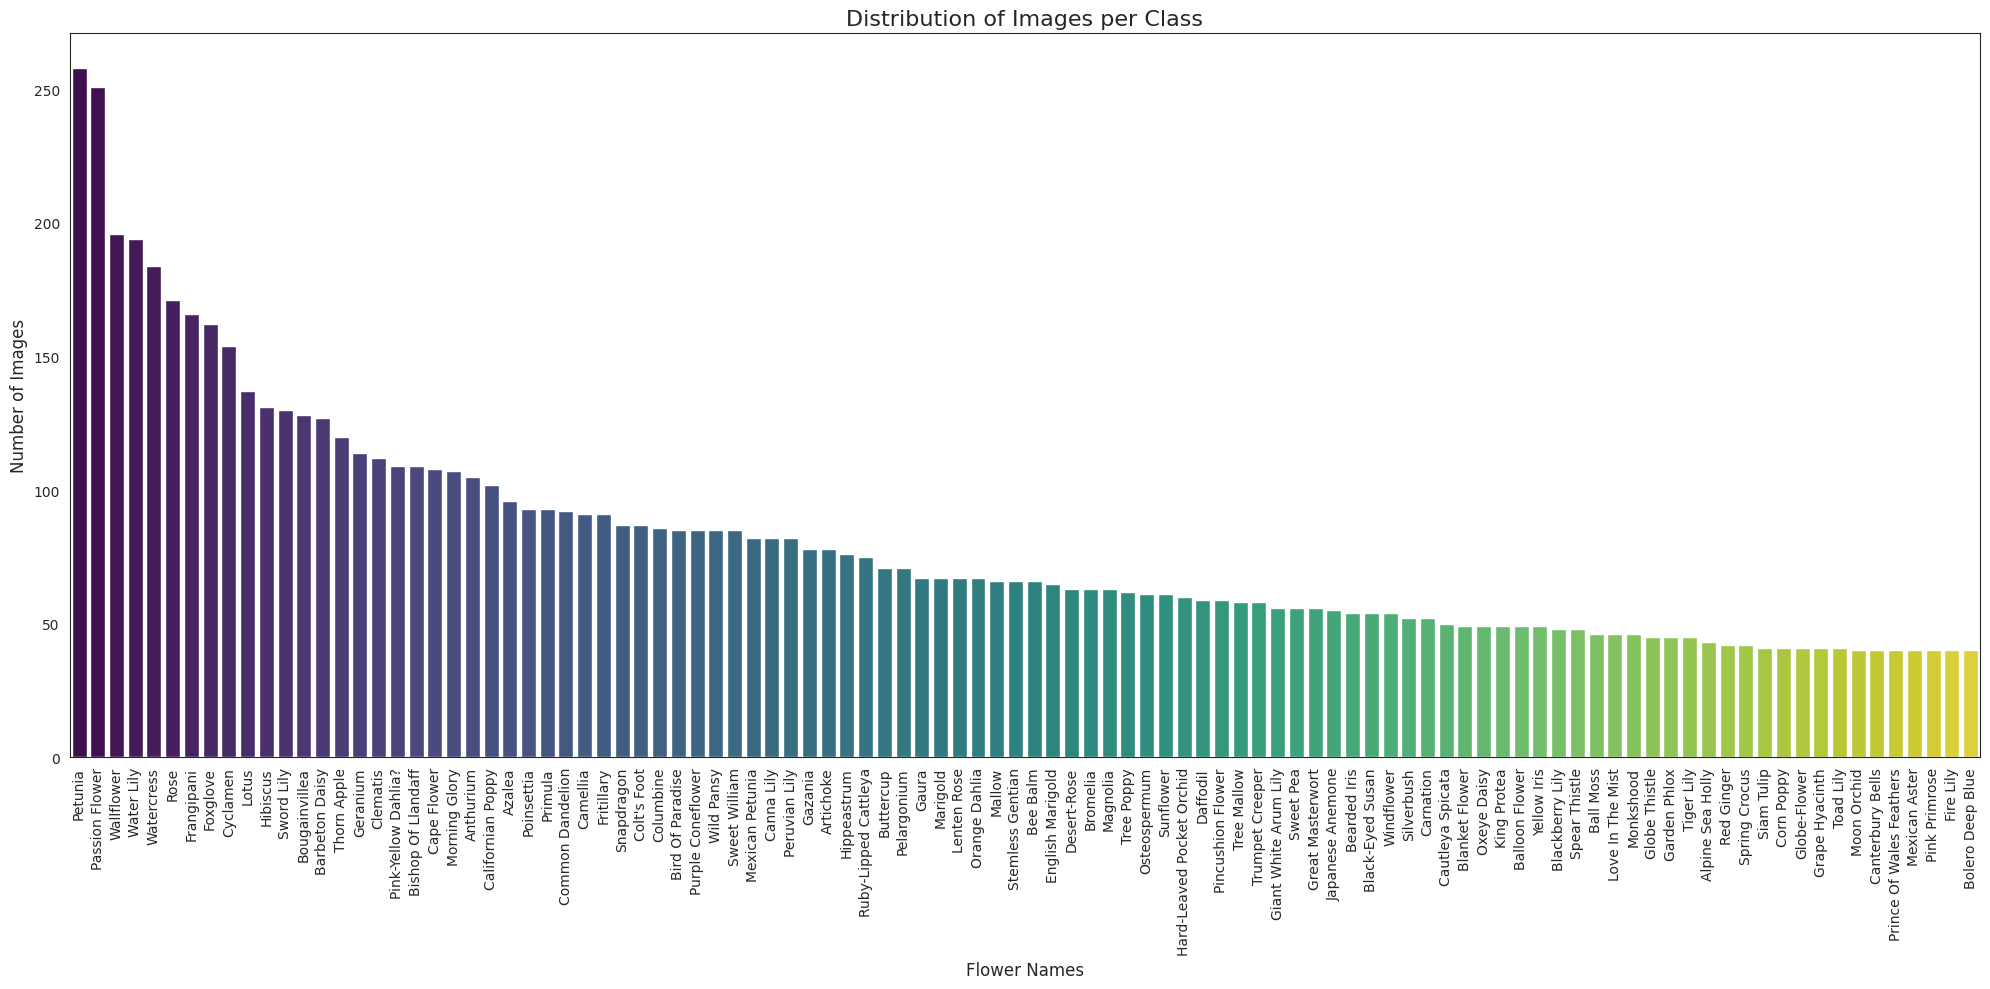

In [23]:
# 3. Plotting distribution of images per class
plt.figure(figsize=(20, 10))  # Increased width and height of the figure
sns.set_style("white")  # Set plot background to white
sns.barplot(x=images_per_class.index, y=images_per_class.values, hue=images_per_class.index, dodge=False, palette="viridis", legend=False)
plt.xlabel('Flower Names', fontsize=12)
plt.ylabel('Number of Images', fontsize=12)
plt.title('Distribution of Images per Class', fontsize=16)
plt.xticks(rotation=90)  # Rotate for better visibility
plt.tight_layout()
plt.show()


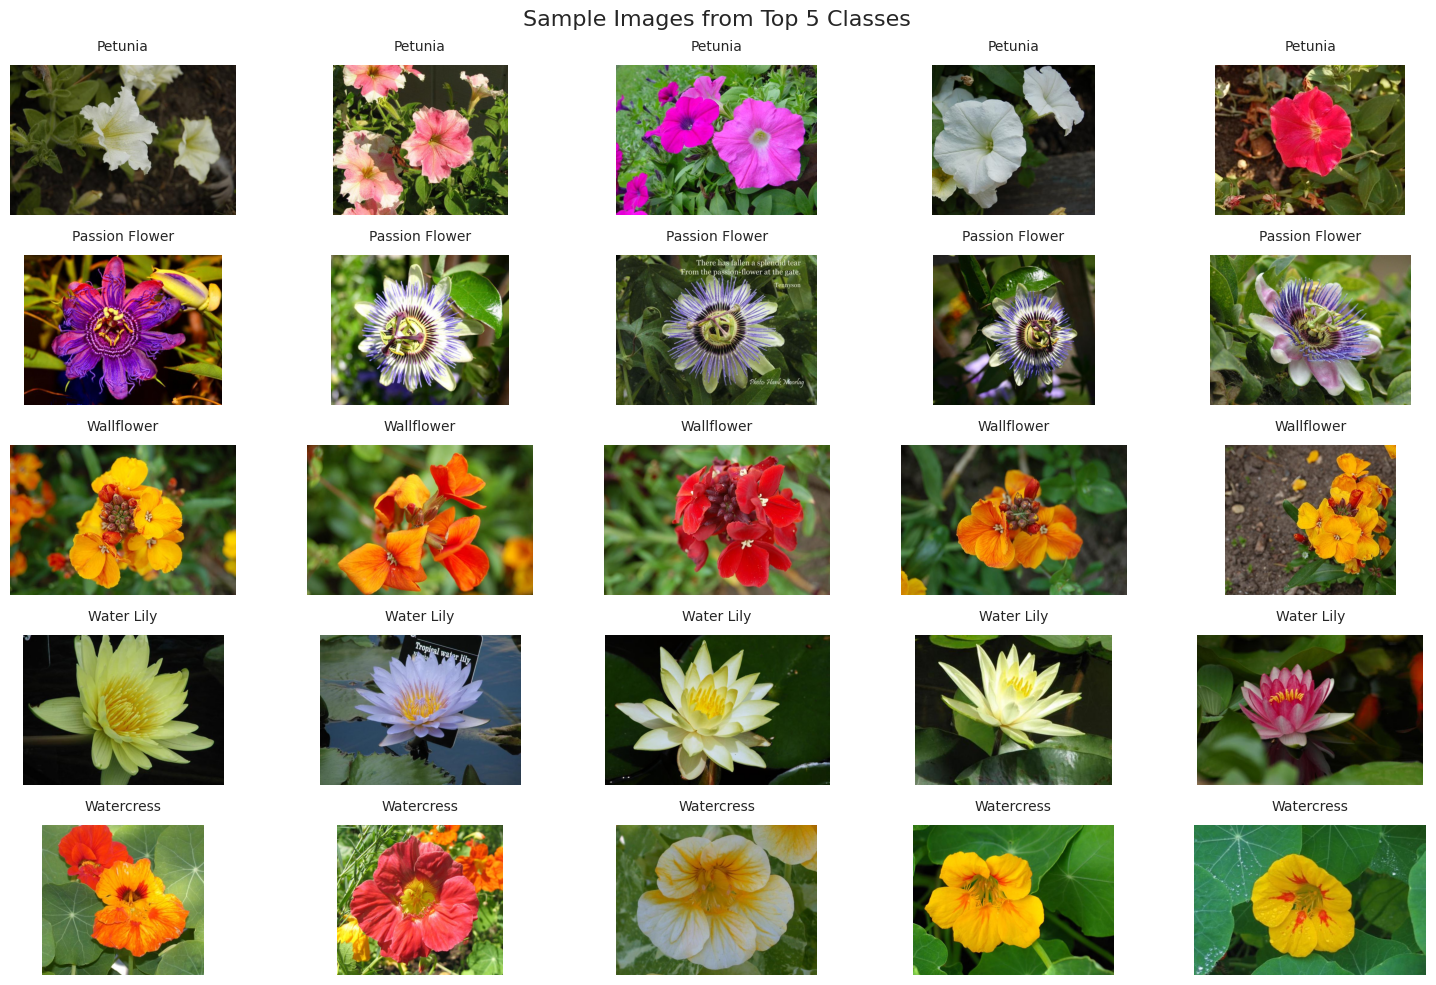

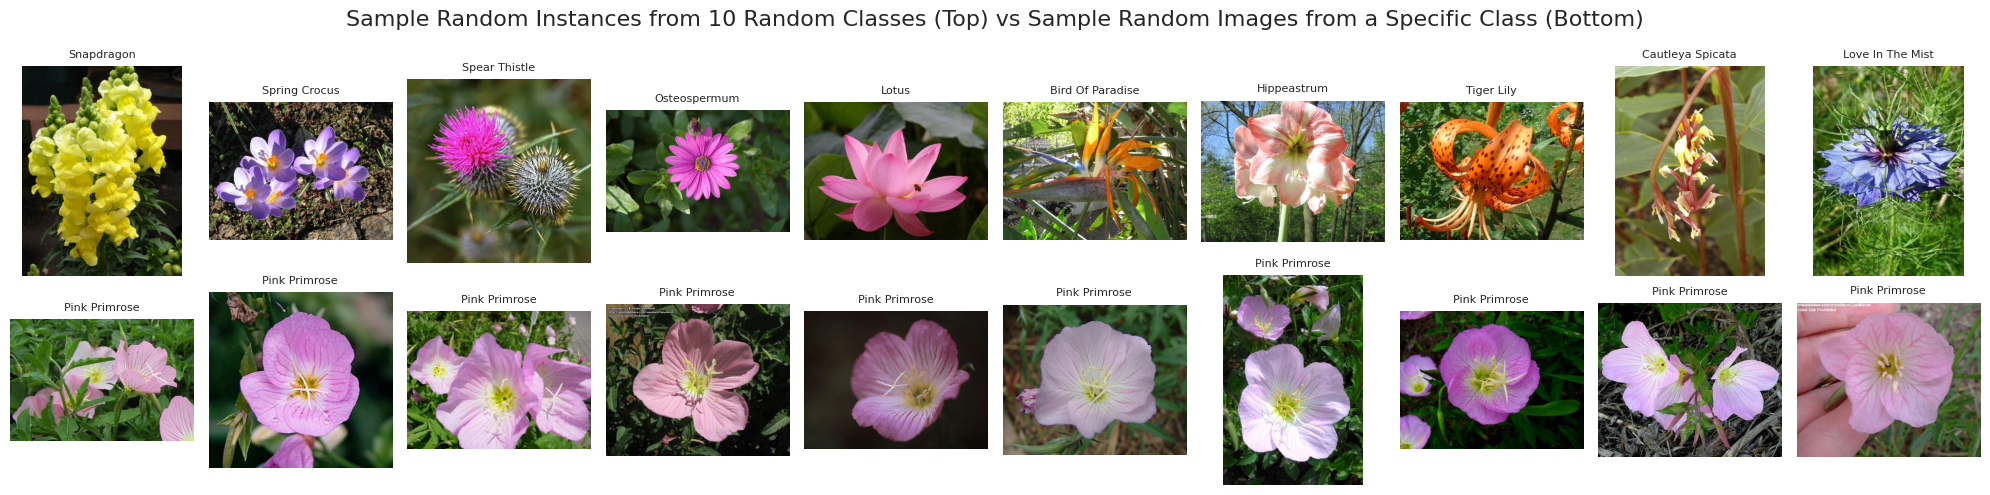

In [24]:
# 4. Displaying sample images for the top 5 classes with most images
top_classes = images_per_class.head(5).index  # Top 5 most populated classes

fig, axes = plt.subplots(len(top_classes), 5, figsize=(15, 10))
for i, flower_name in enumerate(top_classes):
    sample_images = df[df['flower_name'] == flower_name].sample(5)['image_name'].values
    for j, image_name in enumerate(sample_images):
        img_path = os.path.join(images_dir, image_name)
        img = Image.open(img_path)
        axes[i, j].imshow(img)
        axes[i, j].axis('off')
        # Adding the class label above each image
        axes[i, j].set_title(f"{flower_name}", fontsize=10, pad=10)
plt.suptitle('Sample Images from Top 5 Classes', fontsize=16)
plt.tight_layout()
plt.show()

print()

# Combining 10 random images from random classes and a specific flower
random_classes = df['flower_name'].drop_duplicates().sample(10).values
class_1_images = df[df['flower_name'] == NAMES[0]].sample(10)['image_name'].values  # 'pink primrose'

fig, axes = plt.subplots(2, 10, figsize=(20, 5))
for i, flower_name in enumerate(random_classes):
    image_name = df[df['flower_name'] == flower_name].sample(1)['image_name'].values[0]
    img_path = os.path.join(images_dir, image_name)
    img = Image.open(img_path)
    axes[0, i].imshow(img)
    axes[0, i].axis('off')
    axes[0, i].set_title(f"{flower_name}", fontsize=8)

for i, image_name in enumerate(class_1_images):
    img_path = os.path.join(images_dir, image_name)
    img = Image.open(img_path)
    axes[1, i].imshow(img)
    axes[1, i].axis('off')
    axes[1, i].set_title("Pink Primrose", fontsize=8)

plt.suptitle('Sample Random Instances from 10 Random Classes (Top) vs Sample Random Images from a Specific Class (Bottom)', fontsize=16)
plt.tight_layout()
plt.show()

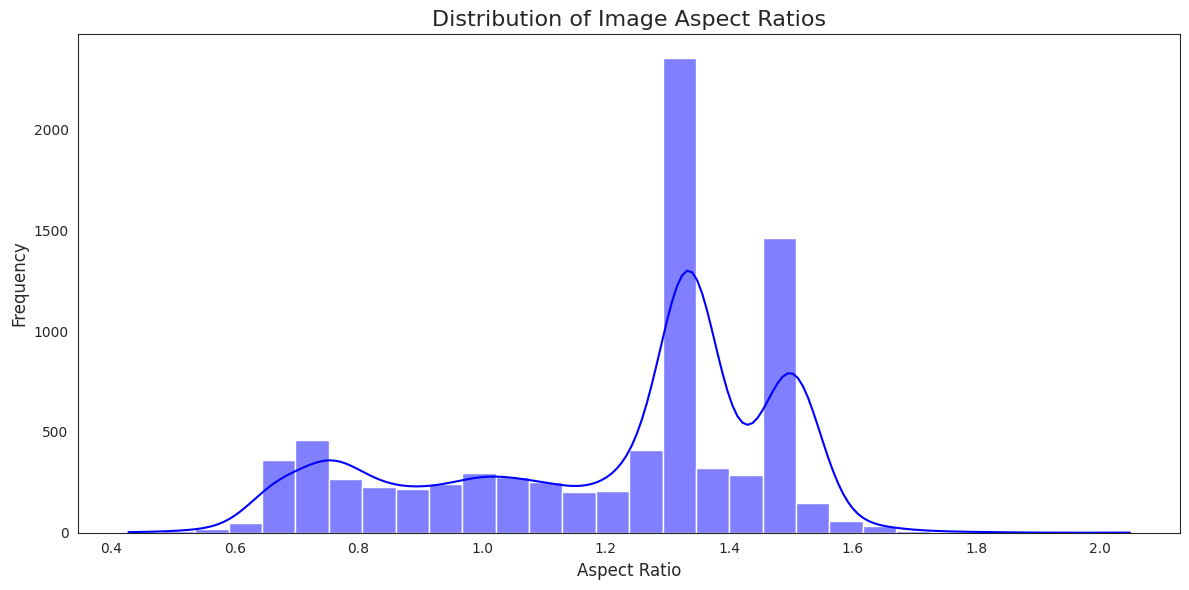

In [25]:
# 5. Computing image dimensions and aspect ratio statistics
image_sizes = []
for image_name in df['image_name']:
    img_path = os.path.join(images_dir, image_name)
    with Image.open(img_path) as img:
        image_sizes.append(img.size)  # (width, height)

# Converting to DataFrame
sizes_df = pd.DataFrame(image_sizes, columns=['Width', 'Height'])
sizes_df['Aspect Ratio'] = sizes_df['Width'] / sizes_df['Height']

# 6. Plotting distribution of aspect ratios
plt.figure(figsize=(12, 6))
sns.histplot(sizes_df['Aspect Ratio'], kde=True, color='blue', bins=30)
plt.xlabel('Aspect Ratio', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.title('Distribution of Image Aspect Ratios', fontsize=16)
plt.tight_layout()
plt.show()

In [26]:
# Summary statistics
print("\nImage Dimension Statistics:")
display(sizes_df.describe())

# 7. Average number of images per class
avg_images_per_class = images_per_class.mean()
print(f"\nAverage number of images per class: {avg_images_per_class:.2f}")


Image Dimension Statistics:


Width       Height  Aspect Ratio
count  8189.000000  8189.000000   8189.000000
mean    630.160581   534.352058      1.210391
std      95.988254    75.453540      0.270855
min     500.000000   500.000000      0.428082
25%     501.000000   500.000000      1.000000
50%     667.000000   500.000000      1.332000
75%     699.000000   501.000000      1.398000
max    1024.000000  1168.000000      2.048000


Average number of images per class: 80.28


In [27]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Rinominare la colonna 'flower_name' in 'label' e ricreare le etichette numeriche
df['label'] = df['flower_name'].map({name: idx for idx, name in enumerate(NAMES)})

# Set seed for reproducibility
seed = 42

# Splitting the dataset: 70% for training, 15% for validation, and 15% for testing
train_df, temp_df = train_test_split(df, test_size=0.3, stratify=df['label'], random_state=seed)
valid_df, test_df = train_test_split(temp_df, test_size=0.5, stratify=temp_df['label'], random_state=seed)

# One-Hot Encoding for the labels
encoder = OneHotEncoder(sparse_output=False)  # Updated to avoid FutureWarning

# Apply One-Hot Encoding to each split
train_labels_encoded = encoder.fit_transform(train_df[['label']])
valid_labels_encoded = encoder.transform(valid_df[['label']])
test_labels_encoded = encoder.transform(test_df[['label']])

# Create a DataFrame for the one-hot encoded labels
class_columns = [f"class_{int(c)}" for c in encoder.categories_[0]]

# Concatenate the original dataframes with their respective one-hot encoded labels
train_df = pd.concat([train_df.reset_index(drop=True), pd.DataFrame(train_labels_encoded, columns=class_columns)], axis=1)
valid_df = pd.concat([valid_df.reset_index(drop=True), pd.DataFrame(valid_labels_encoded, columns=class_columns)], axis=1)
test_df = pd.concat([test_df.reset_index(drop=True), pd.DataFrame(test_labels_encoded, columns=class_columns)], axis=1)

# Get the number of images in each set
train_size = len(train_df)
valid_size = len(valid_df)
test_size = len(test_df)

# Total number of images
total_size = len(df)

# Class distribution in each set
train_class_dist = train_df['label'].value_counts().sort_index()
valid_class_dist = valid_df['label'].value_counts().sort_index()
test_class_dist = test_df['label'].value_counts().sort_index()

# Percentages of each set
train_percentage = (train_size / total_size) * 100
valid_percentage = (valid_size / total_size) * 100
test_percentage = (test_size / total_size) * 100

# Output the results
print("🗂️ Data Split Summary\n" + "="*30)

# Total dataset size
print(f"Total number of images: {total_size} images\n")

# Size of each set
print(f"Training Set: {train_size} images ({train_percentage:.2f}%)")
print(f"Validation Set: {valid_size} images ({valid_percentage:.2f}%)")
print(f"Test Set: {test_size} images ({test_percentage:.2f}%)\n")

# Class distribution in each set
print("🧑‍🏫 Class Distribution:")
print("-"*30)

# Function to display class distributions clearly
def display_class_distribution(class_dist, set_name):
    print(f"\nClass distribution in the {set_name}:")
    print(f"{'Class':<10} {'Number of Images':<20} {'Percentage':<15}")
    print("-" * 50)
    for label, count in class_dist.items():
        percentage = (count / total_size) * 100
        print(f"{label:<10} {count:<20} {percentage:<15.2f}%")
    print("\n")

# Display class distributions for each set
display_class_distribution(train_class_dist, "Training Set")
display_class_distribution(valid_class_dist, "Validation Set")
display_class_distribution(test_class_dist, "Test Set")

# Save the sets to CSV files for further use
train_df.to_csv('Data/train_set.csv', index=False)
valid_df.to_csv('Data/valid_set.csv', index=False)
test_df.to_csv('Data/test_set.csv', index=False)

# Final summary with total number of classes
print("="*30)
print(f"Total number of classes: {df['label'].nunique()}")
print(f"Classes range from {df['label'].min()} to {df['label'].max()}")

🗂️ Data Split Summary
Total number of images: 8189 images

Training Set: 5732 images (70.00%)
Validation Set: 1228 images (15.00%)
Test Set: 1229 images (15.01%)

🧑‍🏫 Class Distribution:
------------------------------

Class distribution in the Training Set:
Class      Number of Images     Percentage     
--------------------------------------------------
0          28                   0.34           %
1          42                   0.51           %
2          28                   0.34           %
3          39                   0.48           %
4          46                   0.56           %
5          32                   0.39           %
6          28                   0.34           %
7          59                   0.72           %
8          32                   0.39           %
9          32                   0.39           %
10         61                   0.74           %
11         61                   0.74           %
12         34                   0.42           %
13   

## Experiments


### Settings

#### Single history graphs

In [28]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt

from tensorflow.keras import layers, models, Model
from tensorflow.keras.applications import VGG16, DenseNet121, InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import math
import numpy as np
import matplotlib.pyplot as plt

# Plotting the Training and Validation Loss
def plot_training_history(history):
    plt.figure(figsize=(12, 6))

    # 'loss' Subplot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # 'accuracy' subplot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # show graphs
    plt.tight_layout()
    plt.show()

#### Create model

In [29]:
def create_model_densenet(input_shape=(224, 224, 3), num_classes=102, freeze_percentage=0.7, dropout_rate=0.3):
    base_model = DenseNet121(weights='imagenet', include_top=False, input_shape=input_shape)
    base_model.trainable = True

    total_layers = len(base_model.layers)
    layers_to_freeze = math.ceil(total_layers * freeze_percentage)

    for layer in base_model.layers[:layers_to_freeze]:
        layer.trainable = False

    x = layers.GlobalAveragePooling2D()(base_model.output)
    x = layers.Dropout(dropout_rate)(x)
    x = layers.Dense(256, activation=None, kernel_regularizer=l2(1e-4))(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(dropout_rate)(x)

    output = layers.Dense(num_classes, activation='softmax', dtype='float32', name='predictions')(x)

    model = Model(inputs=base_model.input, outputs=output)
    model.compile(optimizer=Adam(learning_rate=1e-4), loss='categorical_crossentropy', metrics=['accuracy'])
    model.summary()

    return model

#### Scheduler

In [30]:
def lr_schedule(epoch, lr):
    if epoch < 5:
        return lr + 1e-5
    return lr * math.exp(-0.1)

#### Augmentation Data

In [31]:
import tensorflow as tf
def generator(df, augmentation=False, batch_size=64, image_size=(224, 224)):
  if augmentation:
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(
        rescale=1./255,
        rotation_range=15,
        width_shift_range=0.1,
        height_shift_range=0.1,
        zoom_range=0.1,
        horizontal_flip=True,
        fill_mode='nearest'
    )
  else:
    datagen = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1./255)

  generator = datagen.flow_from_dataframe(
        df,
        directory=images_dir,
        x_col='image_name',
        y_col=class_columns,
        target_size=image_size,
        batch_size=batch_size,
        class_mode='raw',
        shuffle=False)

  return generator

train_generator = generator(train_df)
valid_generator = generator(valid_df)
test_generator = generator(test_df)

train_generation_aug = generator(train_df, augmentation=True)

Found 5732 validated image filenames.
Found 1228 validated image filenames.
Found 1229 validated image filenames.
Found 5732 validated image filenames.


#### Train Model

In [32]:
from tensorflow.keras import layers, models, Model
from tensorflow.keras.applications import VGG16, DenseNet121, InceptionV3
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, LearningRateScheduler
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
import math
import numpy as np
import matplotlib.pyplot as plt

def train_model(model, train_generator, valid_generator, epochs=30):

    early_stopping = EarlyStopping(monitor='val_accuracy', patience=8, restore_best_weights=True, verbose=1)

    lr_scheduler = LearningRateScheduler(lr_schedule)

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=valid_generator,
        callbacks=[early_stopping, lr_scheduler],
        verbose=1)

    return history

### First Experiment

In [33]:
import datetime

model1 = create_model_densenet(freeze_percentage=1)

time_begin = datetime.datetime.now().replace(microsecond=0)
history1 = train_model(model1, train_generator, valid_generator)
model1.save("model1.keras")
time_end = datetime.datetime.now().replace(microsecond=0)

time1 = time_end - time_begin

Model: "functional_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_2          │ (None, 230, 230, 3)    │              0 │ input_layer_1[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_2[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_3          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_3[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,327,142 (27.95 MB)

 Trainable params: 289,126 (1.10 MB)

 Non-trainable params: 7,038,016 (26.85 MB)

Epoch 1/30


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


90/90 ━━━━━━━━━━━━━━━━━━━━ 83s 678ms/step - accuracy: 0.0130 - loss: 4.9537 - val_accuracy: 0.1205 - val_loss: 4.2252 - learning_rate: 1.1000e-04
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 46s 348ms/step - accuracy: 0.0776 - loss: 4.3126 - val_accuracy: 0.2866 - val_loss: 3.6843 - learning_rate: 1.2000e-04
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 36s 295ms/step - accuracy: 0.1735 - loss: 3.8702 - val_accuracy: 0.3901 - val_loss: 3.2316 - learning_rate: 1.3000e-04
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 289ms/step - accuracy: 0.2555 - loss: 3.4218 - val_accuracy: 0.4577 - val_loss: 2.8613 - learning_rate: 1.4000e-04
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 43s 304ms/step - accuracy: 0.3322 - loss: 3.1009 - val_accuracy: 0.5334 - val_loss: 2.5489 - learning_rate: 1.5000e-04
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 40s 297ms/step - accuracy: 0.4107 - loss: 2.7442 - val_accuracy: 0.6034 - val_loss: 2.3186 - learning_rate: 1.3573e-04
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 28s 292ms/step - accuracy: 0.46

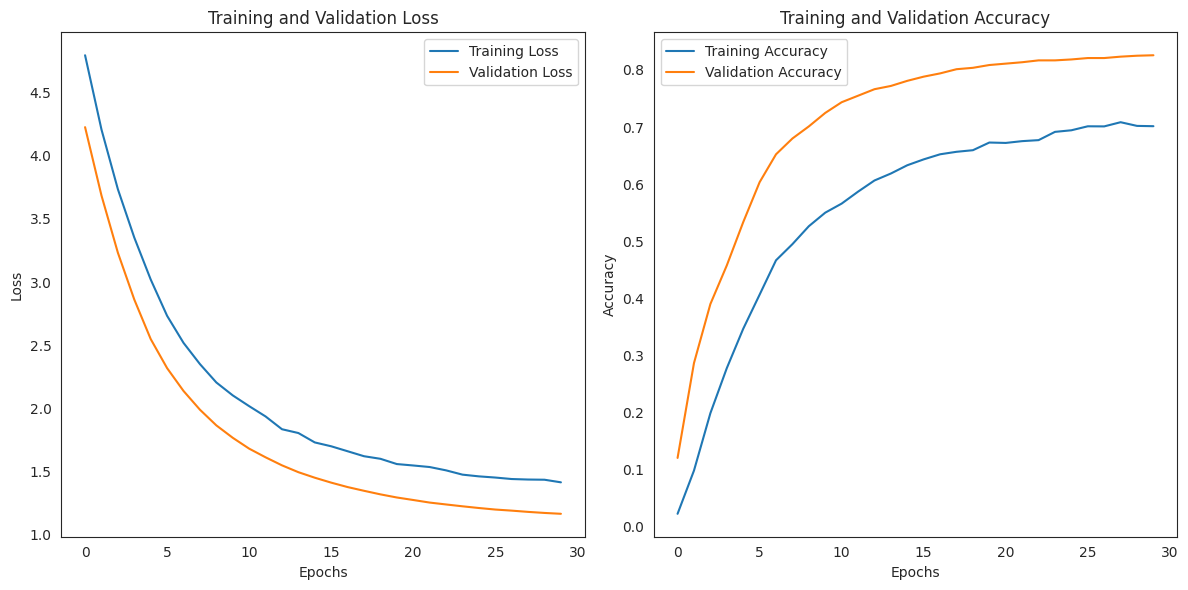

In [34]:
plot_training_history(history1)

In [35]:
# Step 3: Get True Labels
true_classes = test_generator.labels  # Extract true labels
true_classes = np.argmax(true_classes, axis=1)

### Second Experiment

In [1]:
model2 = create_model_densenet(freeze_percentage=1)

time_begin = datetime.datetime.now().replace(microsecond=0)
history2 = train_model(model2, train_generation_aug, valid_generator)
model2.save("model2.keras")
time_end = datetime.datetime.now().replace(microsecond=0)

time2 = time_end - time_begin

NameError: name 'create_model_densenet' is not defined

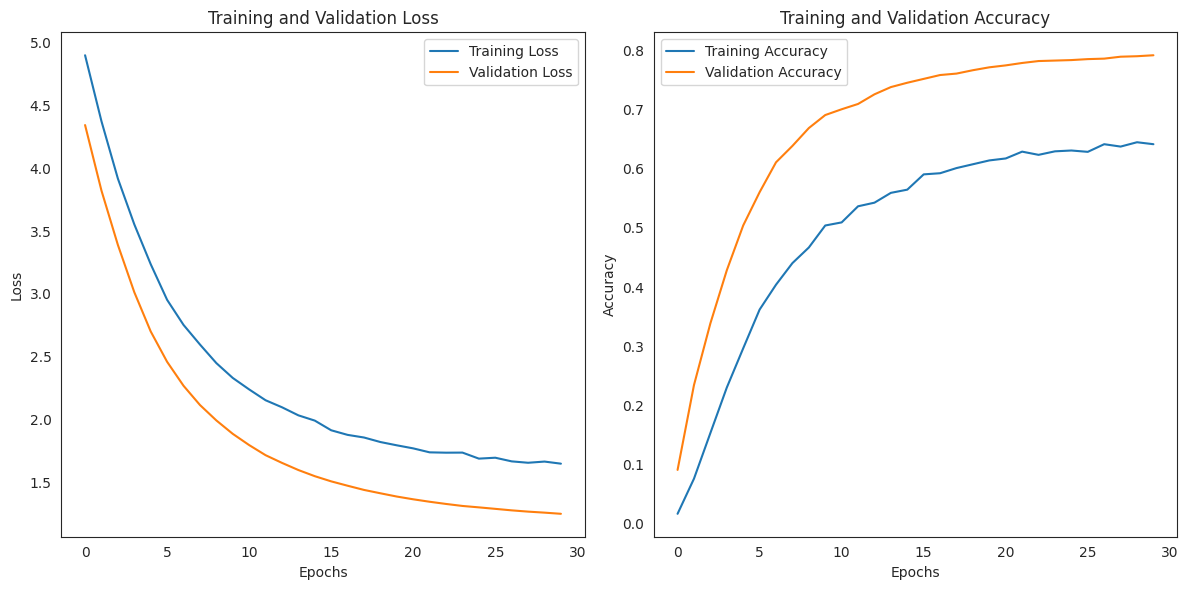

In [38]:
plot_training_history(history2)

### Third Experiment

In [40]:
model3 = create_model_densenet(freeze_percentage=0.7)

time_begin = datetime.datetime.now().replace(microsecond=0)
history3 = train_model(model3, train_generator, valid_generator)
model3.save("model3.keras")
time_end = datetime.datetime.now().replace(microsecond=0)

time3 = time_end - time_begin

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_6          │ (None, 230, 230, 3)    │              0 │ input_layer_3[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_6[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_7          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_7[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,327,142 (27.95 MB)

 Trainable params: 3,178,534 (12.13 MB)

 Non-trainable params: 4,148,608 (15.83 MB)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 137s 820ms/step - accuracy: 0.0688 - loss: 4.5930 - val_accuracy: 0.4821 - val_loss: 2.7861 - learning_rate: 1.1000e-04
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 63s 317ms/step - accuracy: 0.4928 - loss: 2.6533 - val_accuracy: 0.7174 - val_loss: 1.6864 - learning_rate: 1.2000e-04
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 42s 328ms/step - accuracy: 0.7103 - loss: 1.8056 - val_accuracy: 0.8339 - val_loss: 1.2385 - learning_rate: 1.3000e-04
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 29s 313ms/step - accuracy: 0.8335 - loss: 1.2869 - val_accuracy: 0.8990 - val_loss: 0.9884 - learning_rate: 1.4000e-04
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 29s 303ms/step - accuracy: 0.9134 - loss: 0.8793 - val_accuracy: 0.9340 - val_loss: 0.6955 - learning_rate: 1.5000e-04
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 42s 312ms/step - accuracy: 0.9508 - loss: 0.6171 - val_accuracy: 0.9414 - val_loss: 0.5605 - learning_rate: 1.3573e-04
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 30s 314ms/step - ac

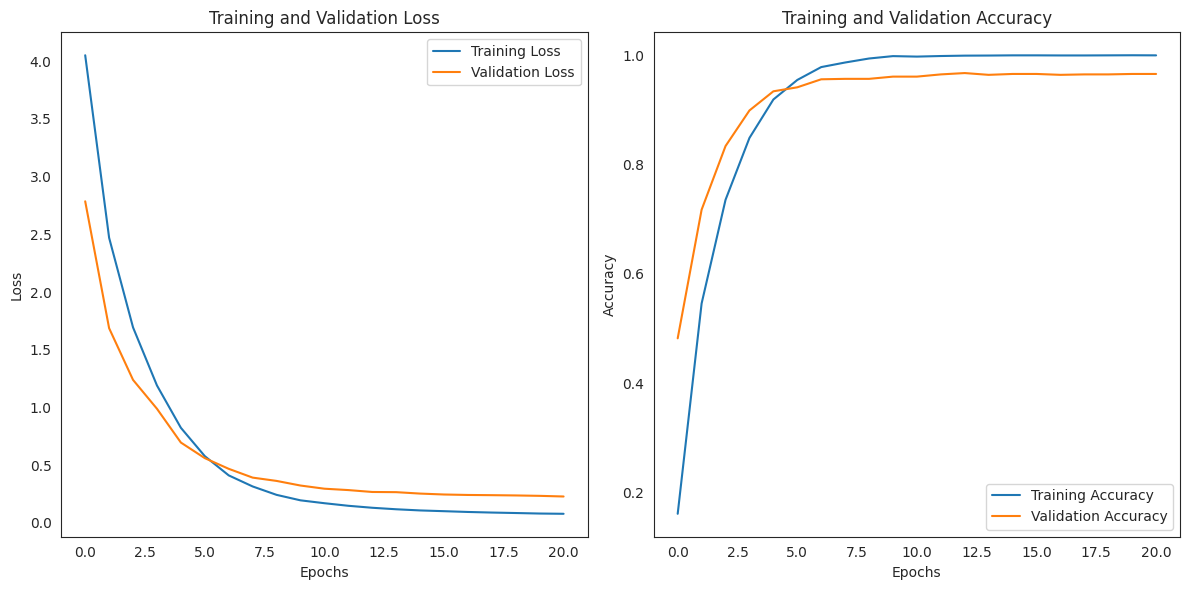

In [41]:
plot_training_history(history3)

### Fourth Experiment

In [ ]:
model4 = create_model_densenet(freeze_percentage=0.7)

time_begin = datetime.datetime.now().replace(microsecond=0)
history4 = train_model(model4, train_generation_aug, valid_generator)
model4.save("model4.keras")
time_end = datetime.datetime.now().replace(microsecond=0)

time4 = time_end - time_begin

Model: "functional_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_4             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_8          │ (None, 230, 230, 3)    │              0 │ input_layer_4[0][0]    │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_conv (Conv2D)       │ (None, 112, 112, 64)   │          9,408 │ zero_padding2d_8[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_bn                  │ (None, 112, 112, 64)   │            256 │ conv1_conv[0][0]       │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv1_relu (Activation)   │ (None, 112, 112, 64)   │              0 │ conv1_bn[0][0]         │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ zero_padding2d_9          │ (None, 114, 114, 64)   │              0 │ conv1_relu[0][0]       │
│ (ZeroPadding2D)           │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ pool1 (MaxPooling2D)      │ (None, 56, 56, 64)     │              0 │ zero_padding2d_9[0][0] │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_bn         │ (None, 56, 56, 64)     │            256 │ pool1[0][0]            │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_0_relu       │ (None, 56, 56, 64)     │              0 │ conv2_block1_0_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_conv       │ (None, 56, 56, 128)    │          8,192 │ conv2_block1_0_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_bn         │ (None, 56, 56, 128)    │            512 │ conv2_block1_1_conv[0… │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_1_relu       │ (None, 56, 56, 128)    │              0 │ conv2_block1_1_bn[0][… │
│ (Activation)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_2_conv       │ (None, 56, 56, 32)     │         36,864 │ conv2_block1_1_relu[0… │
│ (Conv2D)                  │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2_block1_concat       │ (None, 56, 56, 96)     │              0 │ pool1[0][0],           │
│ (Concatenate)             │                        │                │ conv2_block1_2_conv[0… │
├──────────────────────

 Total params: 7,327,142 (27.95 MB)

 Trainable params: 3,178,534 (12.13 MB)

 Non-trainable params: 4,148,608 (15.83 MB)

Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 172s 1s/step - accuracy: 0.0625 - loss: 4.6343 - val_accuracy: 0.4251 - val_loss: 2.8631 - learning_rate: 1.1000e-04
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 85s 894ms/step - accuracy: 0.4019 - loss: 2.9315 - val_accuracy: 0.7028 - val_loss: 1.7294 - learning_rate: 1.2000e-04
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 90s 930ms/step - accuracy: 0.6541 - loss: 1.9668 - val_accuracy: 0.8233 - val_loss: 1.2474 - learning_rate: 1.3000e-04
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 87s 908ms/step - accuracy: 0.7877 - loss: 1.4225 - val_accuracy: 0.8770 - val_loss: 0.9319 - learning_rate: 1.4000e-04
Epoch 5/30
58/90 ━━━━━━━━━━━━━━━━━━━━ 29s 919ms/step - accuracy: 0.8587 - loss: 1.0607

In [ ]:
plot_training_history(history4)

## Considerations after the training

In [ ]:
import matplotlib.pyplot as plt

# Funzione per tracciare tutti i grafici con aggiunta di "solo Training" a sinistra e grafico compatto alla fine
def plot_detailed_metrics_and_combined(history1, history2, history3, history4):
    models = ['Freeze 100% - Data A. = False', 'Freeze 100% - Data A. = True', 'Freeze 70% - Data A. = False', 'Freeze 70% - Data A. = True']
    histories = [history1, history2, history3, history4]

    # Colori personalizzati
    colors = ['green', 'purple', 'blue', 'orange']

    plt.figure(figsize=(24, 20))

    # Colori standard per ogni modello
    for i, history in enumerate(histories):
        # Plot per "Training Accuracy"
        plt.subplot(5, 4, 4 * i + 1)
        plt.plot(history.history['accuracy'], label=f'{models[i]} Training Accuracy', color=colors[i])
        plt.title(f'{models[i]} - Training Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot per "Training Loss"
        plt.subplot(5, 4, 4 * i + 2)
        plt.plot(history.history['loss'], label=f'{models[i]} Training Loss', color=colors[i])
        plt.title(f'{models[i]} - Training Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

        # Plot per "Training e Validation Accuracy"
        plt.subplot(5, 4, 4 * i + 3)
        plt.plot(history.history['accuracy'], label=f'{models[i]} Training Accuracy', color=colors[i])
        plt.plot(history.history['val_accuracy'], linestyle='--', label=f'{models[i]} Validation Accuracy', color=colors[i])
        plt.title(f'{models[i]} - Training and Validation Accuracy')
        plt.xlabel('Epochs')
        plt.ylabel('Accuracy')
        plt.legend()

        # Plot per "Training e Validation Loss"
        plt.subplot(5, 4, 4 * i + 4)
        plt.plot(history.history['loss'], label=f'{models[i]} Training Loss', color=colors[i])
        plt.plot(history.history['val_loss'], linestyle='--', label=f'{models[i]} Validation Loss', color=colors[i])
        plt.title(f'{models[i]} - Training and Validation Loss')
        plt.xlabel('Epochs')
        plt.ylabel('Loss')
        plt.legend()

    # Aggiungi grafici riassuntivi per Training Accuracy e Training Loss
    plt.subplot(5, 4, 17)
    plt.plot(history1.history['accuracy'], label=f'{models[0]} Training Accuracy', color=colors[0])
    plt.plot(history2.history['accuracy'], label=f'{models[1]} Training Accuracy', color=colors[1])
    plt.plot(history3.history['accuracy'], label=f'{models[2]} Training Accuracy', color=colors[2])
    plt.plot(history4.history['accuracy'], label=f'{models[3]} Training Accuracy', color=colors[3])
    plt.title('Training Accuracy (Only)')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(5, 4, 18)
    plt.plot(history1.history['loss'], label=f'{models[0]} Training Loss', color=colors[0])
    plt.plot(history2.history['loss'], label=f'{models[1]} Training Loss', color=colors[1])
    plt.plot(history3.history['loss'], label=f'{models[2]} Training Loss', color=colors[2])
    plt.plot(history4.history['loss'], label=f'{models[3]} Training Loss', color=colors[3])
    plt.title('Training Loss (Only)')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Grafico compatto per Accuracy e Loss (Training + Validation) con colori distinti
    plt.subplot(5, 4, 19)
    plt.plot(history1.history['accuracy'], label=f'{models[0]} Training Accuracy', color=colors[0])
    plt.plot(history1.history['val_accuracy'], linestyle='--', label=f'{models[0]} Validation Accuracy', color=colors[0])
    plt.plot(history2.history['accuracy'], label=f'{models[1]} Training Accuracy', color=colors[1])
    plt.plot(history2.history['val_accuracy'], linestyle='--', label=f'{models[1]} Validation Accuracy', color=colors[1])
    plt.plot(history3.history['accuracy'], label=f'{models[2]} Training Accuracy', color=colors[2])
    plt.plot(history3.history['val_accuracy'], linestyle='--', label=f'{models[2]} Validation Accuracy', color=colors[2])
    plt.plot(history4.history['accuracy'], label=f'{models[3]} Training Accuracy', color=colors[3])
    plt.plot(history4.history['val_accuracy'], linestyle='--', label=f'{models[3]} Validation Accuracy', color=colors[3])

    plt.title('Training and Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(5, 4, 20)
    plt.plot(history1.history['loss'], label=f'{models[0]} Training Loss', color=colors[0])
    plt.plot(history1.history['val_loss'], linestyle='--', label=f'{models[0]} Validation Loss', color=colors[0])
    plt.plot(history2.history['loss'], label=f'{models[1]} Training Loss', color=colors[1])
    plt.plot(history2.history['val_loss'], linestyle='--', label=f'{models[1]} Validation Loss', color=colors[1])
    plt.plot(history3.history['loss'], label=f'{models[2]} Training Loss', color=colors[2])
    plt.plot(history3.history['val_loss'], linestyle='--', label=f'{models[2]} Validation Loss', color=colors[2])
    plt.plot(history4.history['loss'], label=f'{models[3]} Training Loss', color=colors[3])
    plt.plot(history4.history['val_loss'], linestyle='--', label=f'{models[3]} Validation Loss', color=colors[3])

    plt.title('Training and Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    plt.tight_layout()
    plt.show()

# Confronto e visualizzazione dei risultati in un layout dettagliato con grafico compatto
plot_detailed_metrics_and_combined(history1, history2, history3, history4)

### Analysis with test set

In [36]:
from sklearn.metrics import classification_report

def get_classification_report(model):

  predictions = model.predict(test_generator, verbose=0)
  predicted_classes = np.argmax(predictions, axis=1)

  score = model_small0.evaluate(true_classes, predicted_classes, verbose=0)

  report = classification_report(true_classes, predicted_classes, zero_division=0)

  print('Test loss:', score[0])
  print('Test accuracy:', score[1])
  print()
  print(report)


def get_scores(model):
  score_training = model.evaluate(train_generator, verbose=0)
  score_validation = model.evaluate(valid_generator, verbose=0)
  score_test = model.evaluate(test_generator, verbose=0)

  print('Training loss:', score_training[0])
  print('Training accuracy:', score_training[1])
  print()
  print('Validation loss:', score_validation[0])
  print('Validation accuracy:', score_validation[1])
  print()
  print('Test loss:', score_test[0])
  print('Test accuracy:', score_test[1])
  print()

  get_classification_report(model)

  return score_training, score_validation, score_test


score1_training, score1_validation, score1_test = get_scores(model1)

20/20 ━━━━━━━━━━━━━━━━━━━━ 27s 836ms/step
              precision    recall  f1-score   support

           0       1.00      0.50      0.67         6
           1       1.00      0.89      0.94         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         8
           4       0.55      0.67      0.60         9
           5       0.86      1.00      0.92         6
           6       1.00      0.67      0.80         6
           7       0.93      1.00      0.96        13
           8       1.00      0.57      0.73         7
           9       1.00      1.00      1.00         6
          10       0.71      0.77      0.74        13
          11       0.93      1.00      0.96        13
          12       0.88      1.00      0.93         7
          13       1.00      1.00      1.00         7
          14       0.83      0.71      0.77         7
          15       0.71      0.83      0.77         6
          16       1.00      0.92      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([ 50,  46,  40, ...,  15,  37, 101])

In [39]:
score2_training, score2_validation, score2_test = get_scores(model2)

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 578ms/step
              precision    recall  f1-score   support

           0       0.50      0.17      0.25         6
           1       0.89      0.89      0.89         9
           2       0.00      0.00      0.00         6
           3       0.00      0.00      0.00         8
           4       0.55      0.67      0.60         9
           5       0.86      1.00      0.92         6
           6       1.00      0.67      0.80         6
           7       0.93      1.00      0.96        13
           8       0.75      0.43      0.55         7
           9       1.00      1.00      1.00         6
          10       1.00      0.15      0.27        13
          11       1.00      1.00      1.00        13
          12       0.78      1.00      0.88         7
          13       1.00      1.00      1.00         7
          14       0.80      0.57      0.67         7
          15       1.00      1.00      1.00         6
          16       1.00      0.92      

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


array([50, 46, 40, ..., 15, 37, 78])

In [42]:
score3_training, score3_validation, score3_test = get_scores(model3)

20/20 ━━━━━━━━━━━━━━━━━━━━ 19s 597ms/step
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      1.00      1.00         9
           2       1.00      0.67      0.80         6
           3       0.80      0.50      0.62         8
           4       0.80      0.89      0.84         9
           5       1.00      1.00      1.00         6
           6       1.00      1.00      1.00         6
           7       1.00      1.00      1.00        13
           8       0.75      0.86      0.80         7
           9       1.00      1.00      1.00         6
          10       0.81      1.00      0.90        13
          11       0.93      1.00      0.96        13
          12       1.00      1.00      1.00         7
          13       1.00      1.00      1.00         7
          14       0.88      1.00      0.93         7
          15       1.00      1.00      1.00         6
          16       1.00      1.00      

array([52, 46,  4, ..., 15, 37, 78])

In [ ]:
score4_training, score4_validation, score4_test = get_scores(model4)

In [ ]:
results = {
    'Models': ['Freeze 100% - Data A. = False', 'Freeze 100% - Data A. = True', 'Freeze 70% - Data A. = False', 'Freeze 70% - Data A. = True'],
    'Training Time': [time1, time2, time3, time4]
    'Training accuracy': [score1_training[0], score2_training[0], score3_training[0], score4_training[0]],
    'Training loss': [score1_training[1], score2_training[1], score3_training[1], score4_training[1]],
    'Validation accuracy': [score1_validation[0], score2_validation[0], score3_validation[0], score4_validation[0]],
    'Validation loss': [score1_validation[1], score2_validation[1], score3_validation[1], score4_validation[1]],
    'Test accuracy': [score1_test[0], score2_test[0], score3_test[0], score4_test[0]],
    'Test loss': [score1_test[1], score2_test[1], score3_test[1], score4_test[1]]
}

results_df = pd.DataFrame(results)
results_df.to_csv('results.csv', index=False)

display(results_df)